In [117]:
# import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
file_path = 'table-o-australian-energy-statistics-2024.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print("Available sheets:", sheet_names)

Available sheets: ['Title page', 'Method note', 'Index', 'AUS FY', 'NSW FY', 'VIC FY', 'QLD FY', 'WA FY', 'SA FY', 'TAS FY', 'NT FY', 'State summary 2022-23', 'Bioenergy breakdown FY', 'Industry breakdown FY', 'Industry and state FY', 'AUS CY', 'NSW CY', 'VIC CY', 'QLD CY', 'WA CY', 'SA CY', 'TAS CY', 'NT CY', 'State summary 2023']


In [118]:
# load AUS FY into data -- skip first 4 rows and last 4 rows as they contain text
data = xls.parse('AUS FY', skiprows=4, skipfooter=4)

# remove first column as it is empty
data = data.iloc[:, 1:]

# drop row with datatype: recall that GWh refers to Gigawatt-hours and the subsequent rows stated "Non Renewable"
data = data.iloc[2:].reset_index(drop=True)

# drop NAN rows, then drop the "Total" rows
data = data.dropna(how="all").reset_index(drop=True)
data = data[~data.iloc[:, 0].str.lower().str.startswith("total")].reset_index(drop=True)
data = data[~data.iloc[:, 0].str.lower().str.startswith("renewable")].reset_index(drop=True)


# oh see how the data is all objects .. let's put years into index and float everything and imputing 0s for NaNs
data.columns.values[0] = "fuel_type"

for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

data = data.fillna(0)

# Transpose: fuel types become columns
data.set_index("fuel_type", inplace=True)
data = data.transpose().reset_index().rename(columns={"index": "year"})

data["year"] = pd.to_datetime(
    data["year"].str.extract(r"(\d{4})")[0] + "-07-01"
)
data = data.set_index("year")

# look at the data to verify
display(data)
data.info()

fuel_type,Black coal,Brown coal,Natural gas,Oil products,Other a,"Bagasse, wood",Biogas,Wind,Hydro,Large-scale solar PV,Small-scale solar PV,Geothermal
year,,,,,,,,,,,,
1989-07-01,87573.000,33594.000,14359.000,3552.000,0.0,750.000,0.000,0.000,14880.000,0.000,0.000,0.000
1990-07-01,89511.000,36048.000,10772.000,3396.000,0.0,769.000,0.000,0.000,16103.000,0.000,0.000,0.000
1991-07-01,94325.100,34559.000,11633.000,2362.000,0.0,670.000,0.000,0.000,15768.000,0.000,10.900,0.000
1992-07-01,97872.700,33248.000,12295.000,2421.000,0.0,670.000,0.000,0.000,16953.000,0.000,13.300,0.000
1993-07-01,100544.100,34890.000,12199.000,2320.000,0.0,670.000,0.000,4.000,16649.000,0.000,15.900,0.000
1994-07-01,102522.100,35832.000,14913.000,2738.000,0.0,670.000,53.000,7.000,16239.000,0.000,18.900,0.000
1995-07-01,106089.600,39427.000,12445.000,2805.000,0.0,670.000,258.000,7.000,15731.000,0.000,23.400,0.000
1996-07-01,109452.200,41893.000,11426.000,2175.000,0.0,670.000,295.000,7.000,16852.000,0.000,27.800,0.000
1997-07-01,116969.500,46633.000,12934.000,1821.000,0.0,670.000,359.000,8.000,15733.000,0.000,33.500,0.000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 1989-07-01 to 2022-07-01
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Black coal            34 non-null     float64
 1   Brown coal            34 non-null     float64
 2   Natural gas           34 non-null     float64
 3   Oil products          34 non-null     float64
 4   Other a               34 non-null     float64
 5   Bagasse, wood         34 non-null     float64
 6   Biogas                34 non-null     float64
 7   Wind                  34 non-null     float64
 8   Hydro                 34 non-null     float64
 9   Large-scale solar PV  34 non-null     float64
 10  Small-scale solar PV  34 non-null     float64
 11  Geothermal            34 non-null     float64
dtypes: float64(12)
memory usage: 3.5 KB


## Data Preparation

The dataset contains Australian energy statistics across multiple years. We've taken several important preprocessing steps:

1. Cleaned the Excel data by removing headers, footers, and empty rows
2. Converted all energy values to numeric format
3. Properly formatted years as datetime objects
4. Transposed the data to have years as rows and energy sources as columns

This preparation gives us a clean dataset where we can analyze energy consumption patterns over time for various fuel types.

In [119]:
# add a total column that sums across all fuel types for each year
data['total'] = data.sum(axis=1)

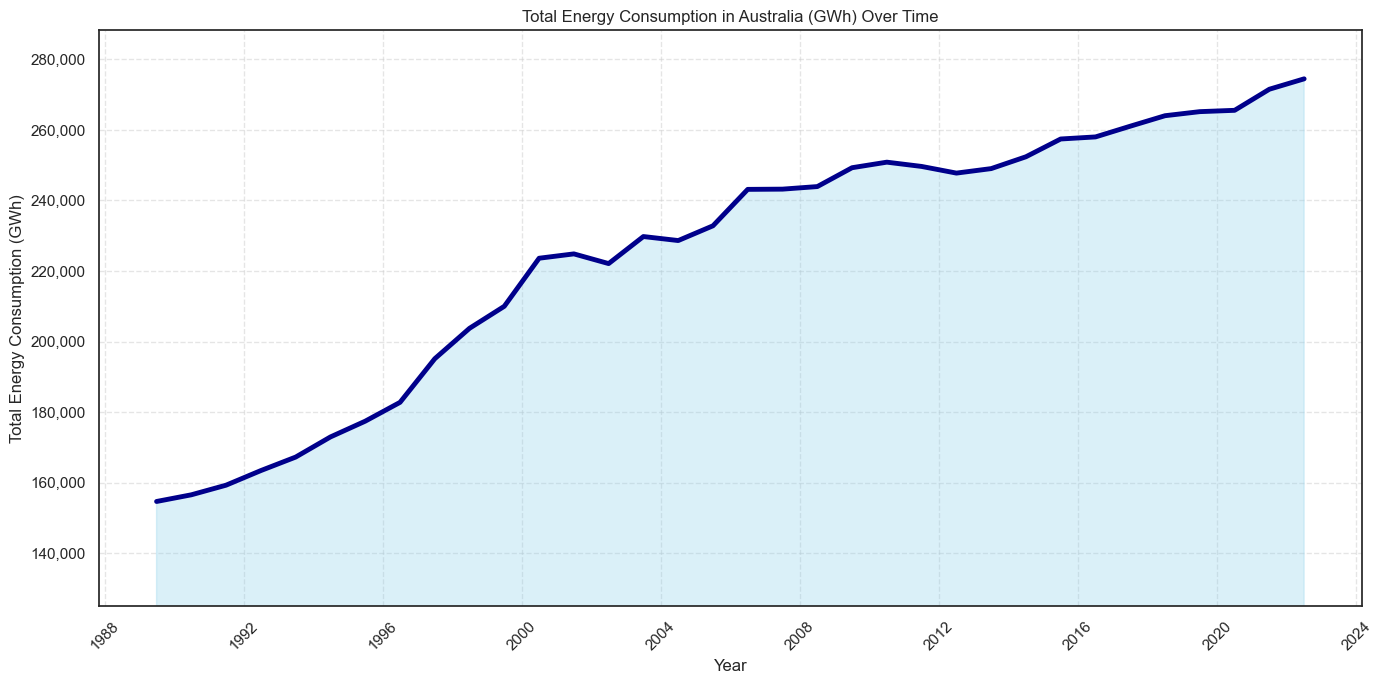

In [123]:
# build the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x=data.index, y='total', color='darkblue', linewidth=3.5)
plt.fill_between(data.index, data["total"], color="skyblue", alpha=0.3)
plt.title('Total Energy Consumption in Australia (GWh) Over Time')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (GWh)')
plt.ylim(bottom=125000)
plt.xticks(rotation=45)

# more aesthetics
import matplotlib.ticker as mticker
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Total Energy Consumption Analysis

The first visualization shows Australia's total energy consumption trend over time. 

We can observe a steady increase in energy consumption from the early 2000s until approximately 2008-2009, which coincides with the global financial crisis. After this period, we see a stabilization and then a slight decline around 2014-2015, before consumption begins to increase again in more recent years.

This pattern likely reflects Australia's economic growth, population increases, and potentially changes in energy efficiency measures or economic sectors over the two-decade period. The gradual upward trend highlights Australia's growing energy needs despite various energy efficiency initiatives.

In [124]:
# nice. but let's see renewable contribution over this time
# Define your groupings
renewables = [
    "Bagasse, wood", "Biogas", "Wind",
    "Hydro", "Large-scale solar PV", "Small-scale solar PV", "Geothermal"
]

non_renewables = [
    "Black coal", "Brown coal", "Natural gas", "Oil products", "Other a"
]

# Compute totals
data["renewable_total"] = data[renewables].sum(axis=1)
data["nonrenewable_total"] = data[non_renewables].sum(axis=1)


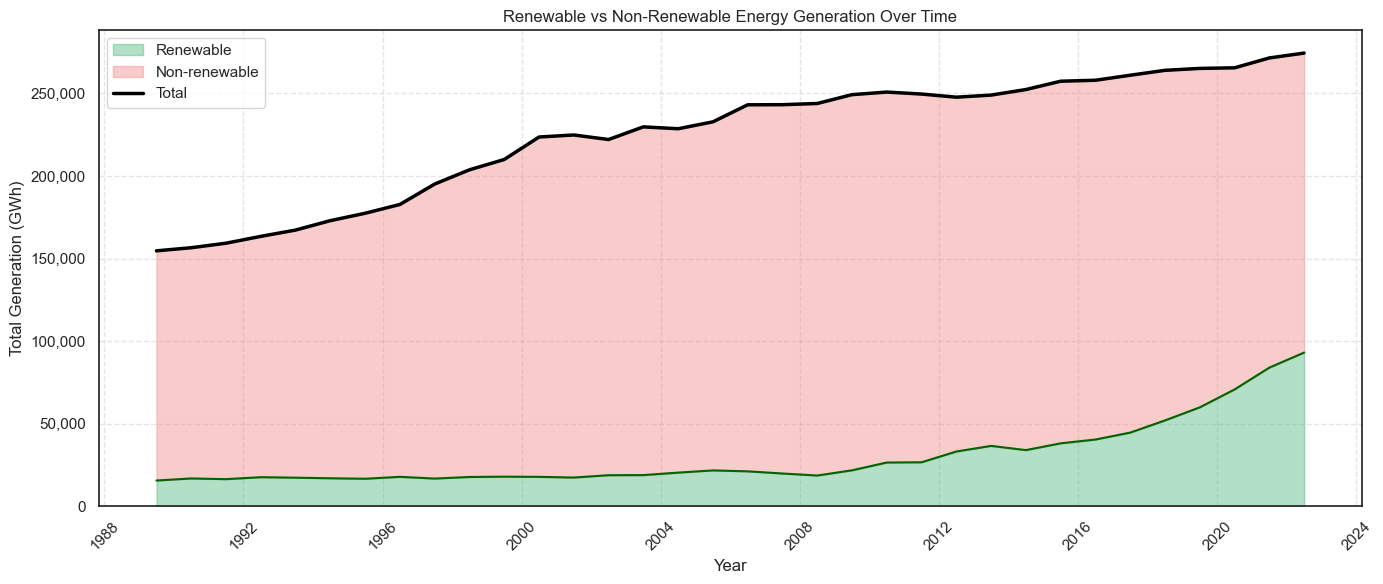

In [129]:
# set the figure size
plt.figure(figsize=(14, 6))

# 1. Fill area: renewables (bottom layer)
plt.fill_between(data.index, 0, data["renewable_total"],
                 color="mediumseagreen", alpha=0.4, label="Renewable")

# 2. Fill area: non-renewables (above renewables)
plt.fill_between(data.index, data["renewable_total"], data["total"],
                 color="lightcoral", alpha=0.4, label="Non-renewable")

# 3. Boundary line between the two
plt.plot(data.index, data["renewable_total"], color="darkgreen", linewidth=1.5)

# 4. Total line
sns.lineplot(x=data.index, y="total", data=data,
             color="black", linewidth=2.5, label="Total")

# Labels and formatting
plt.title("Renewable vs Non-Renewable Energy Generation Over Time")
plt.xlabel("Year")
plt.ylabel("Total Generation (GWh)")
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

import matplotlib.ticker as mticker
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()


## Renewable vs. Non-Renewable Energy Generation

The second visualization compares renewable and non-renewable energy generation in Australia over time. This stacked area chart clearly illustrates the composition of Australia's energy mix and how it has evolved.

The majority of Australia's energy generation comes from non-renewable sources (shown in light coral), primarily coal and natural gas. However, we can observe a notable trend: renewable energy generation (shown in medium sea green) has been gradually increasing, particularly accelerating in recent years.

This transition reflects Australia's growing investment in renewable technologies such as wind, solar, and hydro power. The boundary line between renewables and non-renewables shows a steeper increase around 2018-2020, suggesting policy shifts, technological improvements, or economic factors that have accelerated renewable adoption.

## Key Takeaways

1. **Rising Total Energy Consumption**: Australia's overall energy consumption has shown a long-term increasing trend despite some fluctuations, reflecting the country's economic growth and development. This highlights the challenge of meeting growing energy demands while addressing environmental concerns.

2. **Accelerating Renewable Transition**: While non-renewable sources still dominate Australia's energy mix, the data shows a clear acceleration in renewable energy generation in recent years. This transition is promising for Australia's carbon reduction goals, though non-renewables continue to form the backbone of the country's energy system.